#-------------------------------------------------
# ***Netflix Content Clustering & Content-Based Recommendation System Using NLP and Unsupervised Leaning***
#-------------------------------------------------

#**Step 1 — Install Required Libraries**

In [36]:
!pip install nltk
!pip install scikit-learn

#**Step 2 — Import Libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

#**Step 3 — Load Dataset**

In [38]:
df = pd.read_csv('/content/NetflixSimple.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#**Step 4 — Handle Missing Values**

In [39]:
df.fillna('', inplace=True)

#**Step 5 — Create “Bag of Content”**

In [40]:
df['content'] = df['title'] + ' ' + df['director'] + ' ' + \
                df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

#**Step 6 — Text Cleaning Function (NLP)**

In [41]:
from nltk.corpus.reader import wordlist
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = text.lower()
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
  return ' '.join(text)

df['clean_content'] = df['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**Step 7 — Convert Text to Numbers (TF-IDF)**

In [42]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_content'])

#**Step 8 — Dimensionality Reduction (SVD)**

In [43]:
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)

#**Step 9 — Find Optimal Clusters (Elbow)**

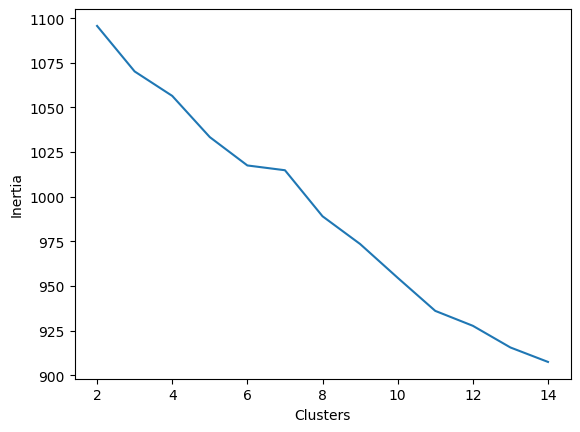

In [44]:
inertia = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_reduced)
  inertia.append(kmeans.inertia_)

plt.plot(range(2,15), inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

#**Step 10 — Apply KMeans Clustering**

In [45]:
kmeans = KMeans(n_clusters=8, random_state=42)
df['cluster'] = kmeans.fit_predict(X_reduced)

#**Step 11 — Recommendation Function (Cosine Similarity)**

In [46]:
similarity = cosine_similarity(X_reduced)

def recommend(title):
  idx = df[df['title'] == title].index[0]
  scores = list(enumerate(similarity[idx]))
  scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]

  for i in scores:
    print(df.iloc[i[0]]['title'])

#**Step 12 — Test Recommendation**

In [47]:
recommend("3 Idiots")

Upstarts
PK
Dil Dhadakne Do
Kuch Kuch Hota Hai
Rang De Basanti


#**Step 13 — Some Required Analysis (Objectives)**

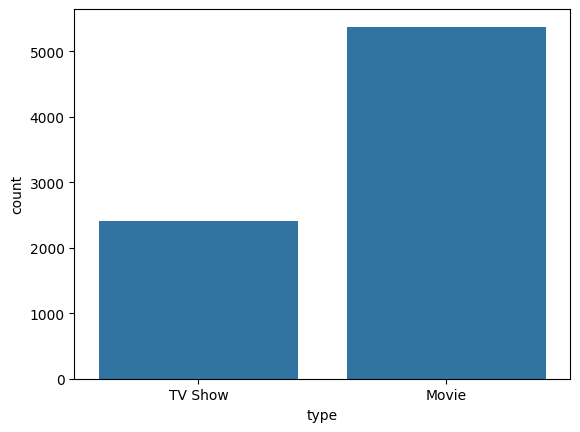

In [48]:
sns.countplot(x='type', data=df)
plt.show()

top_countries = df['country'].value_counts().head(10)
plt.show()

#**Step 14 — Simple Interactive Interface**

In [50]:
movie = input("Enter a movie name: ")
recommend(movie)

Enter a movie name: 3 Idiots
Upstarts
PK
Dil Dhadakne Do
Kuch Kuch Hota Hai
Rang De Basanti


In [ ]:
from google.colab import drive
drive.mount('/content/drive')